In [1]:
#impotring the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the iris datasets
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
#The data is stored as dictionary in iris. For you to see the content of the disctionary you use keys()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
#Getting the data
#iris.data

In [5]:
#Getting the target column
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
#getting the description of the dataset
#iris.DESCR


In [7]:
# values we want to predict
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# creating dataframe for the 
data=pd.DataFrame(iris.data,columns=iris.feature_names)

In [9]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
#Adding the target column to the dataset
data['target']=iris.target

In [11]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
#checking the shape of the data
data.shape

(150, 5)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


##### From above we notice there is no missing data in each column. XGBoost has it's own way of dealing with missing data

In [14]:
# Summary statistics for the data
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
#Checking th disribution of the target calues
data['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

Text(0.5, 1.0, 'Total count of target label')

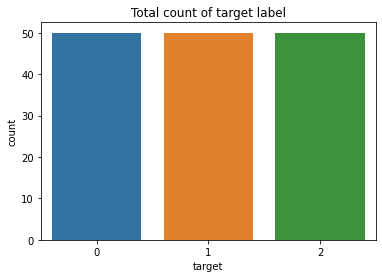

In [16]:
#visualizing the distribution of the target values
sns.countplot(x='target',data=data)
plt.title('Total count of target label')

### Training the data

In [17]:
#Features
X=data.drop('target',axis=1)
y=data['target']

In [18]:
data_matrix= xgb.DMatrix(data=X,label=y)

In [19]:
#Splitting the data to training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=11)

In [20]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [21]:
xgb_clas = xgb.XGBClassifier(objective='multi:softmax',learning_rate=0.1,
                             max_depth=10,subsample=0.7,colsample_bytree=0.3,n_estimators=100,alpha=30)

In [22]:
xgb_clas.fit(X_train,y_train)

[20:54:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=30, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=30,
              reg_lambda=1, scale_pos_weight=None, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
preds=xgb_clas.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [25]:
print(accuracy_score(preds,y_test))
print(classification_report(preds,y_test))
print(confusion_matrix(preds,y_test))

0.3111111111111111
              precision    recall  f1-score   support

           0       1.00      0.31      0.47        45
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.31        45
   macro avg       0.33      0.10      0.16        45
weighted avg       1.00      0.31      0.47        45

[[14 14 17]
 [ 0  0  0]
 [ 0  0  0]]


In [26]:
params = {"objective":'multi:softmax','colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10,'num_class':3}

cv_results = xgb.cv(dtrain=data_matrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="merror", as_pandas=True, seed=123)

In [27]:
cv_results

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.063333,0.016997,0.120000,0.016330
1,0.043333,0.009428,0.060000,0.016330
2,0.040000,0.008165,0.060000,0.016330
3,0.040000,0.008165,0.066667,0.009428
4,0.040000,0.008165,0.066667,0.009428
5,0.040000,0.008165,0.046667,0.009428


In [28]:
##### Using GridSearch to tune the hyperparemeters

In [29]:

#from sklearn.model_selection import GridSearchCV

In [30]:
# parameters={
#     'learning_rate':[0.01,0.05,0.1],
#     'max_depth': range(3,10,1),
#     'subsample': [0.8,0.9],
#     'colsample_bytree': [0.5,0.6],
#     'n_estimators': range(100,300,50),
# }

In [31]:
# grid=GridSearchCV(xgb.XGBClassifier(objective='multi:softprob',alpha=30),param_grid=parameters)

In [32]:
# grid.fit(X_train,y_train)